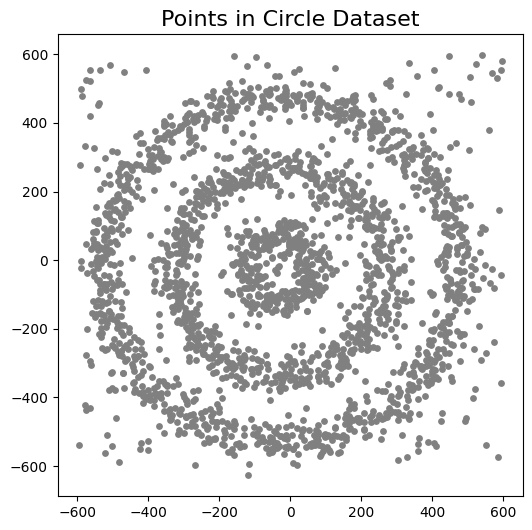

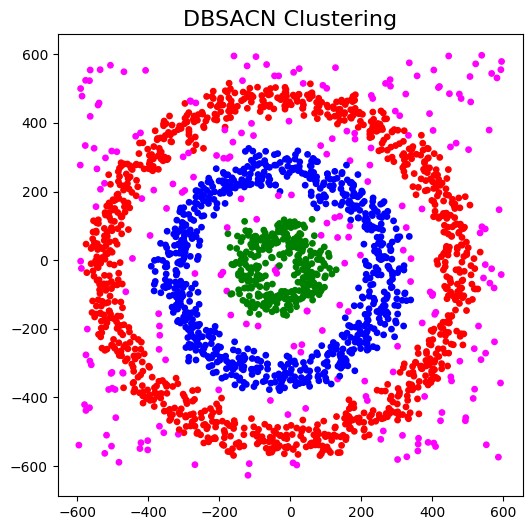

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import DBSCAN

np.random.seed(17)

def CreatePointsInCircle(r, n=100):
  return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

df = pd.DataFrame(CreatePointsInCircle(500,1000))
df = df._append(CreatePointsInCircle(300,700))
df = df._append(CreatePointsInCircle(100,300))
df = df._append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Points in Circle Dataset', fontsize=16)
plt.show()

dbscan_opt=DBSCAN(eps=30, min_samples=6)
dbscan_opt.fit(df[[0,1]])

df['DBSCAN_opt_labels'] = dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

colors=['magenta','red','blue','green']
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSACN Clustering',fontsize=16)
plt.show()